In [36]:
import pandas as pd 
import matplotlib.pyplot as plt


data_type = {"CustomerID": str}
df = pd.read_excel('Online Retail.xlsx', dtype = data_type)


In [37]:
#Data preprocessing

selected_variables = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

df_selected = df[selected_variables]

# Create aggregated variable (Amount)
df_selected['Total_Amount_Spent'] = df_selected['Quantity'] * df_selected['UnitPrice']

# Separate InvoiceDate into Date and Time
df_selected['Date'] = df_selected['InvoiceDate'].dt.date
df_selected['Time'] = df_selected['InvoiceDate'].dt.time

# Filter out rows without values in all variables 
df_selected = df_selected.dropna()

df_selected.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount_Spent,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00


In [38]:
#compare RFM variables to 2012-01-01 
today_date = pd.to_datetime("2012-01-01")

print(df_selected.dtypes)

# Group by Country, calculate Recency, Frequency, and Monetary variables
rfm_dataset = df_selected.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Calculate Recency
    'Quantity': 'count',  # Calculate Frequency
    'Total_Amount_Spent': 'sum'  # Calculate Monetary
})

# Rename the columns for clarity
rfm_dataset.rename(columns = {
    "InvoiceDate": "Recency", 
    "Quantity": 'Frequency',
    "Total_Amount_Spent": "Monetary"
    },
    inplace = True
)

# Filter rows with Monetary variable value not equal to 0
rfm_dataset = rfm_dataset[rfm_dataset['Monetary'] != 0]

# Display the result
rfm_dataset.head()

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                    object
Country                       object
Total_Amount_Spent           float64
Date                          object
Time                          object
dtype: object


,Recency,Frequency,Monetary
CustomerID,,,
12347,24,182,4310.00
12348,97,31,1797.24
12349,40,73,1757.55
12350,332,17,334.40
12352,58,95,1545.41


           Country  Total_Amount_Spent
35  United Kingdom         6767873.394
23     Netherlands          284661.540
10            EIRE          250285.220
14         Germany          221698.210
13          France          196712.840


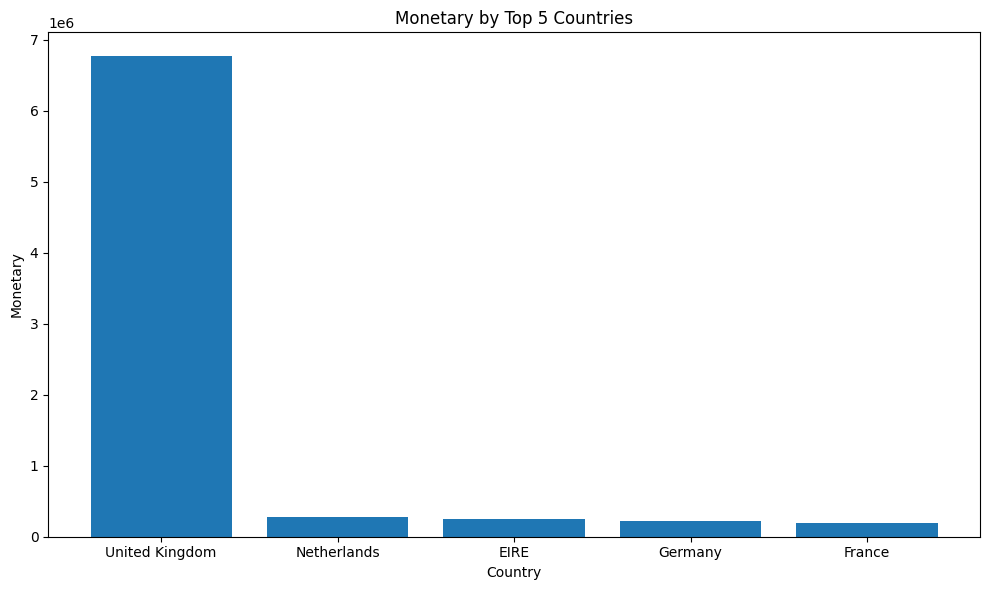

In [52]:
Monetary_Country = df_selected[['Country', 'Total_Amount_Spent']]

Monetary_Country= Monetary_Country.groupby('Country')['Total_Amount_Spent'].sum().reset_index()

Monetary_Country = Monetary_Country.sort_values(by='Total_Amount_Spent', ascending=False)

Monetary_Country = Monetary_Country.head(5)

print(Monetary_Country)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(Monetary_Country['Country'], Monetary_Country['Total_Amount_Spent'])
plt.xlabel('Country')
plt.ylabel('Monetary')
plt.title('Monetary by Top 5 Countries')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


                             Description  Quantity
3805   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
1771             JUMBO BAG RED RETROSPOT     45066
217        ASSORTED COLOUR BIRD ORNAMENT     35314
3716  WHITE HANGING HEART T-LIGHT HOLDER     34147
2279     PACK OF 72 RETROSPOT CAKE CASES     33409
2612                      POPCORN HOLDER     30504
2669                  RABBIT NIGHT LIGHT     27094
2057             MINI PAINT SET VINTAGE      25880
2245          PACK OF 12 LONDON TISSUES      25321
2277  PACK OF 60 PINK PAISLEY CAKE CASES     24163


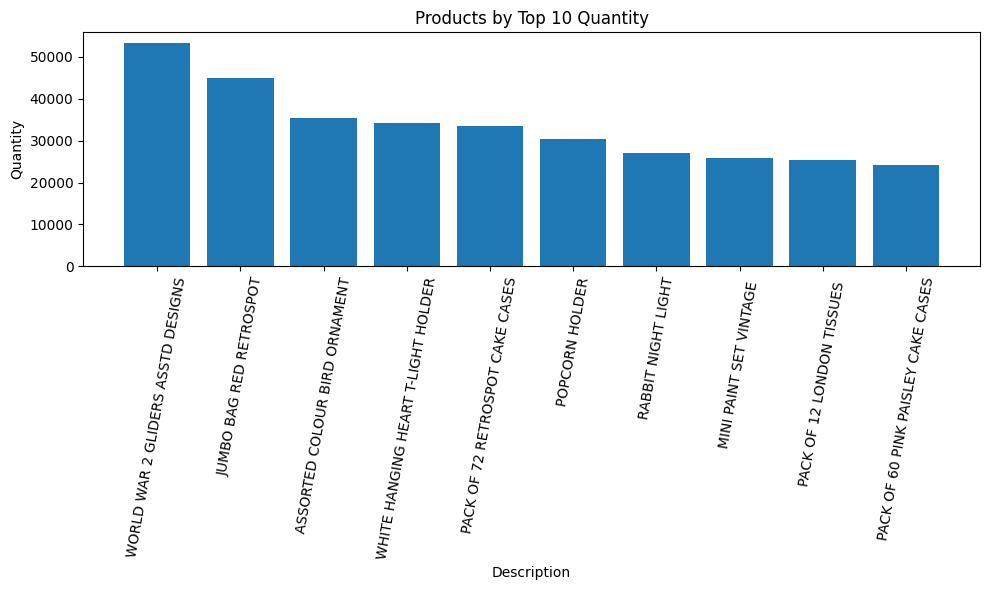

In [57]:
#most popular product 
Quantity_Product = df_selected[["Description", 'Quantity']]

Quantity_Product = Quantity_Product.groupby('Description')['Quantity'].sum().reset_index()

Quantity_Product = Quantity_Product.sort_values(by='Quantity', ascending=False)

Quantity_Product = Quantity_Product.head(10)

print(Quantity_Product)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(Quantity_Product['Description'], Quantity_Product['Quantity'])
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.title('Products by Top 10 Quantity')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()



In [86]:
# Select relevant columns
Monetary_Product = df_selected[["Description", "Quantity","UnitPrice", "Total_Amount_Spent"]]

Monetary_Product = df_selected.groupby('Description').agg({
    'Total_Amount_Spent': 'sum',
    'Quantity': 'sum',  # Optional: Also sum the quantity for reference
}).reset_index()

# Sort by Total_Amount_Spent in descending order
Monetary_Product = Monetary_Product.sort_values(by='Total_Amount_Spent', ascending=False)

# Select the top 10 most profitable products
Monetary_Product = Monetary_Product.head(10)


# Print the top 10 most profitable products
print(Monetary_Product)

# Plot the graph
# plt.figure(figsize=(10, 6))
# plt.bar(Monetary_Product['Description'], Monetary_Product['Total_Amount_Spent'])
# plt.xlabel('Description')
# plt.ylabel('Monetary_Product')
# plt.title('Products by Top 10 Monetary')
# plt.xticks(rotation=80)
# plt.tight_layout()
# plt.show()



                             Description  Total_Amount_Spent  Quantity
2780            REGENCY CAKESTAND 3 TIER           132870.40     11555
3716  WHITE HANGING HEART T-LIGHT HOLDER            93823.85     34147
1771             JUMBO BAG RED RETROSPOT            83236.76     45066
2355                       PARTY BUNTING            67687.53     15027
2624                             POSTAGE            66710.24      3002
217        ASSORTED COLOUR BIRD ORNAMENT            56499.22     35314
2669                  RABBIT NIGHT LIGHT            51137.80     27094
725                        CHILLI LIGHTS            45936.81      9570
2323     PAPER CHAIN KIT 50'S CHRISTMAS             41500.48     15164
2405      PICNIC BASKET WICKER 60 PIECES            39619.50        61
